<h1 align="center">UST, Zewail City</h1>
<h2 align="center">CIE 555 (Spring 2022)</h2>
<h2 align="center">Lab 2 part#2: Regression using Neural Networks</h2>
<h2 align="center">Anhar Hasan</h2>


#Installation and import statements

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 


     \ 25.9 MB 59.5 MB/s
     |████████████████████████████████| 10.9 MB 13.1 MB/s 
     |████████████████████████████████| 596 kB 61.4 MB/s 
     |████████████████████████████████| 102 kB 11.8 MB/s 
     |████████████████████████████████| 675 kB 27.7 MB/s 
     |████████████████████████████████| 4.7 MB 61.3 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 812 kB 61.6 MB/s 
     |████████████████████████████████| 38.1 MB 2.5 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=19d8f5317296e10b6a966953aba3347f4c976dacfe1ea9c2649b2b7c50c04fa6
  Stored in directory: /tmp/pip-ephem-wheel-cache-g5u600c7/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=d65456306423cdd11119c7fc4b1be84d109befa11ea82cbaa81616a0649101e8
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

import pandas_profiling as pp
from pandas_profiling import ProfileReport

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Dense

#Dataset

The dataset used in this lab is Computer Hardware DataSet. We will build a model to predict the CPU performance based on initally 9 features which includes attributes like:  cycle time, memory size, etc.
The 10th feature; the ERP which is an integer that represents the Estimated Relative Performance of the CPU in-hand.



In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data'
column_names =  ['Vendors','Model_Name','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP']

raw_dataset = pd.read_csv(url, names = column_names, na_values='?', comment='\t',sep=',', skipinitialspace=False)

In [ ]:
dataset = raw_dataset.copy()
dataset.tail()

,Vendors,Model_Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47
208,wang,vs-90,480,1000,4000,0,0,0,45,25


##Exploratory data analysis

In [ ]:
profile = ProfileReport(dataset)
profile

In [ ]:
#No need to use this line here since we have no issing data, but I wrote it for your future reference.
dataset = dataset.dropna()

In [ ]:
#  One hot encoding as we have caregorical values in the variable "Vendors"
dataset= pd.get_dummies(dataset, columns= ['Vendors'], prefix='Vendors', drop_first=False)

#For Ordinal hot encoding, uncomment the following two lines INSTEAD, and take care of the number of the input features then, they will be 8
#However it's NOT a correct practice here sincethere is no kind of order in the vendors.
#encoder = OrdinalEncoder()
#dataset.update(pd.DataFrame(encoder.fit_transform(dataset['Vendors'].values.reshape(-1,1)), columns = ['Vendors']))
dataset.head()

,Model_Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP,Vendors_adviser,...,Vendors_microdata,Vendors_nas,Vendors_ncr,Vendors_nixdorf,Vendors_perkin-elmer,Vendors_prime,Vendors_siemens,Vendors_sperry,Vendors_sratus,Vendors_wang
0,32/60,125,256,6000,256,16,128,198,199,1,...,0,0,0,0,0,0,0,0,0,0
1,470v/7,29,8000,32000,32,8,32,269,253,0,...,0,0,0,0,0,0,0,0,0,0
2,470v/7a,29,8000,32000,32,8,32,220,253,0,...,0,0,0,0,0,0,0,0,0,0
3,470v/7b,29,8000,32000,32,8,32,172,253,0,...,0,0,0,0,0,0,0,0,0,0
4,470v/7c,29,8000,16000,32,8,16,132,132,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 208
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Model_Name            209 non-null    object
 1   MYCT                  209 non-null    int64 
 2   MMIN                  209 non-null    int64 
 3   MMAX                  209 non-null    int64 
 4   CACH                  209 non-null    int64 
 5   CHMIN                 209 non-null    int64 
 6   CHMAX                 209 non-null    int64 
 7   PRP                   209 non-null    int64 
 8   ERP                   209 non-null    int64 
 9   Vendors_adviser       209 non-null    uint8 
 10  Vendors_amdahl        209 non-null    uint8 
 11  Vendors_apollo        209 non-null    uint8 
 12  Vendors_basf          209 non-null    uint8 
 13  Vendors_bti           209 non-null    uint8 
 14  Vendors_burroughs     209 non-null    uint8 
 15  Vendors_c.r.d         209 non-null    ui

In [ ]:
#Drop the column of the labels "ERP", and Model_Name since we actually don't need it.
x_data= dataset.drop(columns=['ERP', 'Model_Name'], axis=1)
y_data= dataset['ERP']
#Splitting the data to train and validation 
train_features,val_features, train_targets,val_targets=train_test_split(x_data,y_data,test_size=0.2)
train_targets= np.array(train_targets).reshape(-1,1)
val_targets= np.array(val_targets).reshape(-1,1)

#Feature and target scaling
feature_scaler= StandardScaler().fit(train_features)
train_features= feature_scaler.transform(train_features)
val_features= feature_scaler.transform(val_features)

target_scaler= StandardScaler().fit(train_targets)
train_targets=target_scaler.transform(train_targets)
val_targets=target_scaler.transform(val_targets)

#Tensorflow model

A model is, abstractly:
* A function that computes something on tensors (a forward pass)
* Some variables that can be updated in response to training

Most models are made of layers. Layers are functions with a known mathematical structure that can be reused and have trainable variables. In TensorFlow, most high-level implementations of layers and models, such as Keras, are built on the same foundational class: tf.Module.

In [ ]:
class Dense(tf.Module):
  def __init__(self, in_features, out_features, name=None):
    #Constructor 
    #self: whenever an object calls its method, the object itself is passed as the first argument.
    #Note: The child's __init__() function overrides the inheritance of the parent's __init__() function.
    #To keep the inheritance of the parent's __init__() function, add a call to the parent's __init__() function
    super().__init__(name=name)
    self.w = tf.Variable(
      tf.random.normal([in_features, out_features]), name='w')
    self.b = tf.Variable(tf.zeros([out_features]), name='b')

  def __call__(self, x):
    #object() is shorthand for object.__call__()
    y = tf.matmul(x, self.w) + self.b
    return y

In [ ]:
class SequentialModule(tf.Module):
  def __init__(self, name=None):
    super().__init__(name=name)

    self.dense_1 = Dense(in_features=37, out_features=3)
    self.dense_2 = Dense(in_features=3, out_features=1)

  def __call__(self, x):
    x = self.dense_1(x)
    x=tf.nn.relu(x)
    x= self.dense_2(x)
    return x

In [ ]:
# You have made a model!
my_model = SequentialModule()

# Call it
print("Model results:", my_model(tf.constant([train_features[0]], dtype= tf.float32)))

Model results: tf.Tensor([[5.0132146]], shape=(1, 1), dtype=float32)


In [ ]:
def loss(pred,target):
  return tf.losses.mean_squared_error(target, pred)

In [ ]:
import os
import datetime

X=tf.constant([train_features], dtype= tf.float32) #Convert features to a constant tensor
y=tf.constant([train_targets], dtype= tf.float32)  #Convert targets to a constant tensor
X_val= tf.constant([val_features], dtype= tf.float32) #Convert features to a constant tensor
y_val= tf.constant([val_targets], dtype= tf.float32)  #Convert targets to a constant tensor

my_model = SequentialModule()    #Create a model

#Define hyperparameters
learning_rate=0.3
num_epochs = 50
  
#Define an optimizer 
optimizer = tf.optimizers.Adam( learning_rate )

all_train_loss=[]
all_val_loss= []


#Training loop
for e in range(num_epochs):
    with tf.GradientTape() as tape:
        train_loss = loss(my_model(X), y)
        train_loss_numpy= tf.reduce_mean(train_loss).numpy()
        all_train_loss.append(train_loss_numpy)
        val_loss= loss(my_model(X_val), y_val)
        val_loss_numpy= tf.reduce_mean(val_loss).numpy()
        all_val_loss.append(val_loss_numpy)
    weights= my_model.trainable_variables
    grads= tape.gradient(train_loss, weights)
    optimizer.apply_gradients(zip(grads, weights))
    print("Epoch:", e, "Train loss:", train_loss_numpy, "Validation loss:",val_loss_numpy)

Epoch: 0 Train loss: 35.27852 Validation loss: 33.08432
Epoch: 1 Train loss: 6.833352 Validation loss: 5.3764677
Epoch: 2 Train loss: 8.106444 Validation loss: 7.7827053
Epoch: 3 Train loss: 6.378013 Validation loss: 6.9546647
Epoch: 4 Train loss: 3.2589557 Validation loss: 4.3370447
Epoch: 5 Train loss: 1.5398096 Validation loss: 2.511629
Epoch: 6 Train loss: 1.0558038 Validation loss: 2.114024
Epoch: 7 Train loss: 1.1187699 Validation loss: 2.451147
Epoch: 8 Train loss: 1.3296914 Validation loss: 3.088268
Epoch: 9 Train loss: 1.2896088 Validation loss: 3.0177944
Epoch: 10 Train loss: 0.8542086 Validation loss: 1.712282
Epoch: 11 Train loss: 0.64107376 Validation loss: 0.63124377
Epoch: 12 Train loss: 0.98747957 Validation loss: 1.0675446
Epoch: 13 Train loss: 0.71251726 Validation loss: 0.73583746
Epoch: 14 Train loss: 0.41714984 Validation loss: 0.5425342
Epoch: 15 Train loss: 0.6931038 Validation loss: 1.5092977
Epoch: 16 Train loss: 0.5675087 Validation loss: 1.2573485
Epoch: 17 T

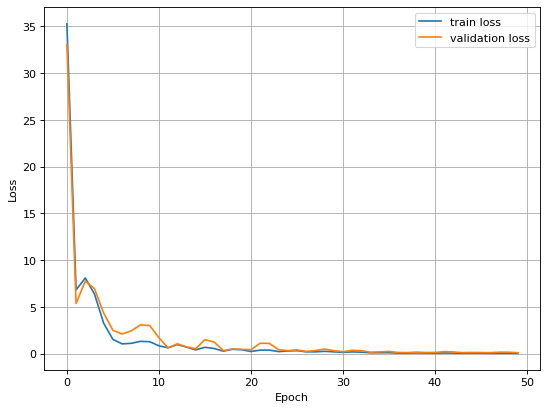

In [ ]:
%matplotlib inline 
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(all_train_loss, label='train loss')
plt.plot(all_val_loss, label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)


# Changes made
-I changed the loss fucntion to be mean squared error instead of mean absolute error.

-Also I tuned the hyperparameters until I was satisfied with the curve.

#Task

Perform two or more of the following modifications to the above tensorflow model to reach a better performance (lower train and validation losses and a more stable learning/loss curve that doesn't show underfitting or overfitting): 

1. Fine tune the hyperparameters of the above model (i.e number of iterations, learning rate)

2. Experiment with another loss function suitable for the regression task. 

3. Change the optimizer 

4. Change the model architecture (number of layers, activation functions, number of hidden nodes, etc.)


#Keras model

In [ ]:
model = keras.Sequential([
    layers.Dense(3, activation = 'relu', input_shape=[train_features.shape[1]]), #Input Layer
    layers.Dense(1) #Output Layer
   ])

# Compile the network :
model.compile(loss = keras.losses.MeanAbsoluteError(), 
                 optimizer = 'adam', metrics = keras.metrics.MeanAbsoluteError())
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 3)                 114       
                                                                 
 dense_13 (Dense)            (None, 1)                 4         
                                                                 
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_features, train_targets,validation_data=(val_features, val_targets),epochs=30)

Epoch 1/30
6/6 [==============================] - 1s 51ms/step - loss: 0.9328 - mean_absolute_error: 0.9328 - val_loss: 0.8404 - val_mean_absolute_error: 0.8404
Epoch 2/30
6/6 [==============================] - 0s 18ms/step - loss: 0.8916 - mean_absolute_error: 0.8916 - val_loss: 0.8022 - val_mean_absolute_error: 0.8022
Epoch 3/30
6/6 [==============================] - 0s 9ms/step - loss: 0.8559 - mean_absolute_error: 0.8559 - val_loss: 0.7642 - val_mean_absolute_error: 0.7642
Epoch 4/30
6/6 [==============================] - 0s 12ms/step - loss: 0.8219 - mean_absolute_error: 0.8219 - val_loss: 0.7271 - val_mean_absolute_error: 0.7271
Epoch 5/30
6/6 [==============================] - 0s 13ms/step - loss: 0.7904 - mean_absolute_error: 0.7904 - val_loss: 0.6901 - val_mean_absolute_error: 0.6901
Epoch 6/30
6/6 [==============================] - 0s 15ms/step - loss: 0.7592 - mean_absolute_error: 0.7592 - val_loss: 0.6541 - val_mean_absolute_error: 0.6541
Epoch 7/30
6/6 [===================

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

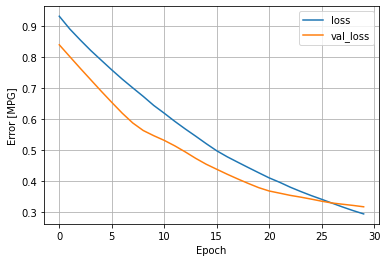

In [ ]:
plot_loss(history)


#References

https://becominghuman.ai/image-classification-with-tensorflow-2-0-without-keras-e6534adddab2

https://www.tensorflow.org/tutorials/keras/regression

https://www.tensorflow.org/guide/basic_training_loops

https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough

https://archive.ics.uci.edu/ml/datasets/auto+mpg
https://www.geeksforgeeks.org/what-is-the-difference-between-__init__-and-__call__/ 

https://pypi.org/project/pandas-profiling/